# 1. M1.S1.Evolution and Fundamentals of HPC




## Anatomy of Supercomputers

### Overview

Supercomputers are designed to perform complex computations at extremely high speeds, often measured in petaflops (quadrillions of calculations per second). These systems are composed of various layers, each contributing to the overall performance and capabilities of the supercomputer. Understanding the anatomy of supercomputers provides insight into how these systems are structured and optimized for High-Performance Computing (HPC).

### Layers of a Supercomputer

The anatomy of a supercomputer can be broken down into several layers, each with specific components that serve a distinct purpose. These layers include the application layer, programming environment, tools, cluster software, system software, and hardware.

| **Layer**              | **Component**                    | **Description**                                               | **Examples**                                                                 |
|------------------------|----------------------------------|---------------------------------------------------------------|-------------------------------------------------------------------------------|
| **Application Layer**  | Application                      | Specific domains using HPC                                     | Climate & Meteorology, Drug design, Quantum Chromodynamics (QCD), Astrophysics, Protein Dynamics |
| **Programming Environment** | Language                  | Programming languages used in HPC                              | C/C++, Fortran, Python, CUDA                                                  |
|                        | Parallel Programming             | Frameworks for writing parallel programs                       | MPI, OpenMP, OpenACC, CUDA, Domain-Specific Languages (DSL)                  |
|                        | Libraries                        | Supportive software libraries                                  | Mathematical libraries, I/O libraries, checkpointing libraries               |
| **Tools**              | Compilers                        | Translate code to machine language                             | Intel Compiler (icc), GCC, LLVM                                               |
|                        | Debuggers                        | Tools to find bugs in software                                 | TotalView, Allinea DDT, PGI, GNU GDB                                          |
|                        | Performance Analysis Tools       | Tools to analyze and optimize performance                      | Score-P, Scalasca, Vampir, VTune, Extrae/Paraver                              |
| **Cluster Software**   | Resource Management/Job Scheduling | Managing resources and job queueing                           | SLURM, Torque/Maui, IBM LSF, PBS Pro                                          |
|                        | File System                      | Systems to manage data storage                                 | Lustre, NFS, GPFS, BeeGFS                                                     |
|                        | Cluster Management               | Tools for managing cluster operations                          | ParaStation, Various Monitoring Tools, Software Installation Tools, Container Technologies (e.g., Docker) |
| **System Software**    | Operating System                 | The OS on which the HPC systems run                            | Linux OS (Red Hat, CentOS, etc.)                                              |
| **Hardware**           | Hardware                         | Physical components of HPC systems                             | Servers, Storage Solutions, Switches, Infrastructure Components               |

**Table 1: Anatomy of a HPC System. Different layers from hardware to applications.**

In the next chapter, we will delve deeper into each of these components to understand their roles and how they contribute to the overall performance of a supercomputer.


# Introduction to Parallelization

## Overview

Parallelization is the process of dividing a computational task into smaller subtasks that can be executed simultaneously on multiple processors. The goal of parallelization is to reduce the overall computation time by utilizing the combined processing power of multiple CPU cores.

### Why Parallelization?

As computational tasks become more complex and data sizes increase, the time required to perform these tasks can grow significantly. By dividing the workload across multiple processors, we can achieve faster computation times. However, parallelization is not without its challenges, especially when considering overheads, synchronization, and the architecture of the computing environment.

### Example: Sum of Squares

Let's consider a simple example where we compute the sum of squares for large numbers. We'll start by implementing this in both serial (one processor) and parallel (multiple processors) forms to observe the difference in performance.


In [1]:
import time
from concurrent.futures import ProcessPoolExecutor

# A function to compute the sum of squares for a given range
def sum_of_squares(n):
    return sum(i * i for i in range(n))

# Parameters for testing
numbers = [10**7, 10**7, 10**7, 10**7]

# Serial Execution
start_time = time.time()
results_serial = [sum_of_squares(n) for n in numbers]
end_time = time.time()
serial_time = end_time - start_time

print(f"Serial Execution Time: {serial_time:.4f} seconds")

# Parallel Execution using ProcessPoolExecutor
start_time = time.time()
with ProcessPoolExecutor() as executor:
    results_parallel = list(executor.map(sum_of_squares, numbers))
end_time = time.time()
parallel_time = end_time - start_time

print(f"Parallel Execution Time: {parallel_time:.4f} seconds")

# Comparison
print(f"Parallel execution was {serial_time/parallel_time:.2f} times faster than serial execution.")


Serial Execution Time: 20.4811 seconds
Parallel Execution Time: 9.3641 seconds
Parallel execution was 2.19 times faster than serial execution.


## Understanding the Results and Overheads

### Observing the Execution Times

In the example above, we compute the sum of squares for four large numbers. The computation is first done sequentially (serial execution), and then in parallel using Python's `ProcessPoolExecutor`.

- **Serial Execution**: The task is executed on a single processor, where each number in the list is processed one after the other.
- **Parallel Execution**: The task is divided into smaller tasks, each processed on a separate CPU core simultaneously.

### Overheads in Parallel Execution

While parallelization aims to reduce computation time, it introduces certain overheads:

1. **Task Splitting**: The workload needs to be divided into smaller tasks, which can introduce delays.
2. **Process Management**: In parallel execution, especially with `ProcessPoolExecutor`, there is overhead associated with creating and managing multiple processes.
3. **Inter-Process Communication**: If tasks need to communicate or share data, this can introduce additional delays.
4. **Resource Contention**: On shared environments like Google Colab, multiple users or processes may compete for the same resources, leading to variable performance.

These overheads can sometimes negate the benefits of parallelization, especially for tasks that aren't large enough to justify the overhead.

### Google Colab and Virtual Machines

Google Colab operates in a virtualized environment, where resources like CPUs and memory are shared among many users. This can result in varying performance due to:

- **Dynamic Resource Allocation**: CPU cores and memory are allocated dynamically based on availability, which can lead to fluctuations in performance.
- **VM Overheads**: Virtual Machines (VMs) add an additional layer of abstraction over the physical hardware, introducing some latency.

Despite these challenges, parallelization is still a powerful tool when used appropriately.


## Moore's Law and Its Implications

### What is Moore's Law?

Moore's Law, observed by Gordon Moore in 1965, states that the number of transistors on a microchip doubles approximately every two years, while the cost per transistor decreases. This exponential growth has led to the rapid increase in computational power over the past several decades.

### Implications for Parallelization

As processors have become more powerful and contain more cores, parallelization has become increasingly relevant. However, Moore's Law also highlights a key challenge: while the number of cores may increase, the benefits of adding more cores diminish due to factors like:

- **Memory Bottlenecks**: Even with more cores, if the memory bandwidth doesn't scale proportionately, the system may become bottlenecked by memory access times.
- **Synchronization Overhead**: With more cores, the need to synchronize tasks across processors can introduce significant overhead.

### Example: Increasing Number of Cores

If we increase the number of cores in a system without increasing the memory bandwidth or optimizing for synchronization, we may observe diminishing returns. Let's consider this through an example.


In [2]:
# Adjusting the number of chunks (cores) for parallel execution
for num_chunks in [1, 2, 4, 8, 16]:
    start_time = time.time()
    with ProcessPoolExecutor(max_workers=num_chunks) as executor:
        results_parallel = list(executor.map(sum_of_squares, numbers))
    end_time = time.time()
    parallel_time = end_time - start_time
    print(f"Parallel Execution Time with {num_chunks} chunks: {parallel_time:.4f} seconds")


Parallel Execution Time with 1 chunks: 6.3409 seconds
Parallel Execution Time with 2 chunks: 6.0319 seconds
Parallel Execution Time with 4 chunks: 6.2660 seconds
Parallel Execution Time with 8 chunks: 5.4716 seconds
Parallel Execution Time with 16 chunks: 7.5991 seconds


## Amdahl's Law and the Limits of Parallelization

### What is Amdahl's Law?

Amdahl's Law, formulated by Gene Amdahl in 1967, provides a theoretical limit to the speedup achievable by parallelizing a computational task. It states that the overall speedup of a program is limited by the portion of the program that cannot be parallelized.

### Formula

The speedup `S` achievable with `P` processors is given by:

\[ S(P) = \frac{1}{(1 - f) + \frac{f}{P}} \]

Where:
- `f` is the fraction of the program that can be parallelized.
- `1 - f` is the portion of the program that must be executed serially.

### Implications of Amdahl's Law

- **Diminishing Returns**: As the number of processors increases, the speedup begins to level off, especially if a significant portion of the task cannot be parallelized.
- **Optimization Focus**: To maximize speedup, efforts should focus on parallelizing as much of the program as possible (`f` should be as large as possible).

### Example: Varying Parallelizable Portions

Let's simulate the effect of varying the parallelizable portion of a task. We'll assume that a certain fraction of the `sum_of_squares` computation can be parallelized.


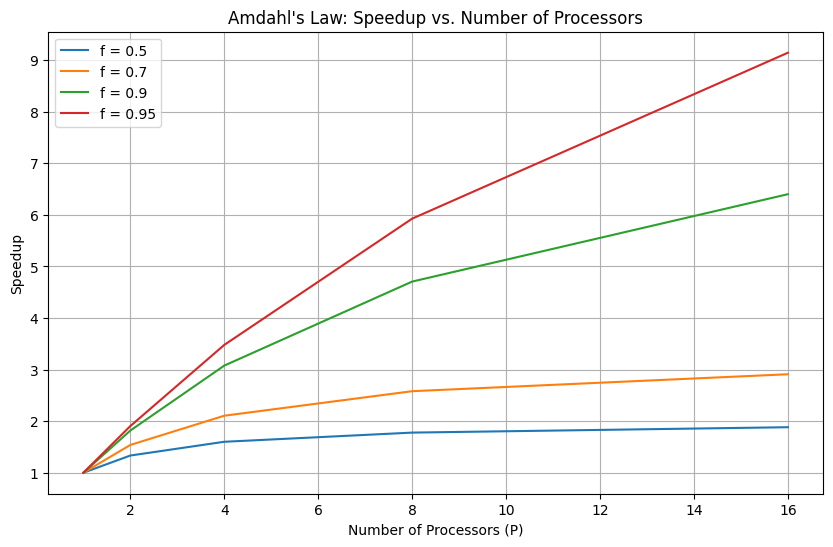

In [3]:
def simulate_amdahls_law(f, P):
    return 1 / ((1 - f) + f / P)

# Plotting the speedup for different values of P and f
import matplotlib.pyplot as plt

P_values = [1, 2, 4, 8, 16]
f_values = [0.5, 0.7, 0.9, 0.95]

plt.figure(figsize=(10, 6))

for f in f_values:
    speedups = [simulate_amdahls_law(f, P) for P in P_values]
    plt.plot(P_values, speedups, label=f'f = {f}')

plt.xlabel('Number of Processors (P)')
plt.ylabel('Speedup')
plt.title('Amdahl\'s Law: Speedup vs. Number of Processors')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion and Practical Takeaways

### Key Points

1. **Parallelization**: It is a powerful tool for speeding up computational tasks, but it comes with overheads, especially in virtualized environments like Google Colab.
2. **Moore's Law**: The continued growth in computational power has enabled more widespread use of parallelism, but physical limits are becoming more apparent.
3. **Amdahl's Law**: Highlights the limitations of parallelization, emphasizing the need to focus on optimizing the parallelizable portion of a program.

### Practical Considerations

- **Task Size**: Parallelization is most beneficial for large, computationally intensive tasks where the overhead of managing parallel processes is outweighed by the speedup achieved.
- **Environment**: In virtualized environments like Google Colab, performance can vary due to dynamic resource allocation and other factors. Understanding these limitations is key to effectively utilizing parallel computing.

### Further Reading

- **Moore's Law**: Explore how the growth of computational power has slowed and the implications for future technologies.
- **Amdahl's Law**: Study how Amdahl's Law applies to different types of parallel computing architectures.

Understanding these concepts will help you better leverage parallel computing in your own work, whether in research, development, or data science.
